# Cannabis Project

### Introduction

In this project, a Cannabis datasets found on Kaggle (https://www.kaggle.com/ostaski/ocp-dataset) have been analyzed visualized. The data have been cleaned and some charts have been generated.

In [49]:
import warnings

In [50]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#reading the csv file
df = pd.read_csv('datasets_254652_535029_OCPDB.csv')
df.head()

,OCPID,Strain,SampleID,DateRecorded,ReportType,ChemicalLab,H2O,TotalTHC,THC,Δ8-THC,...,ProjectURL,Study,StudyURL,Run,RunURL,DatePublished,Spots,Bases,Size,Notes
0,420,CHEM 4,17002739.0,12 May 2018,C,Cascadia Labs,8.60%,193.0,193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,421,Z7,17002740.0,12 May 2018,C,Cascadia Labs,8.50%,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,422,ACDC/Harlequin,17002741.0,12 May 2018,C,Cascadia Labs,14.80%,141.0,141.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423,HarleyWreck,17002742.0,12 May 2018,C,Cascadia Labs,8.40%,75.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,424,Sour Amnesia,17002833.0,12 May 2018,C,Cascadia Labs,13.20%,222.0,222.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Checking for duplicates
df[df.duplicated(subset=None, keep='first')==True]

,OCPID,Strain,SampleID,DateRecorded,ReportType,ChemicalLab,H2O,TotalTHC,THC,Δ8-THC,...,ProjectURL,Study,StudyURL,Run,RunURL,DatePublished,Spots,Bases,Size,Notes


In [53]:
#describing the dataset
df.describe()

,OCPID,SampleID,TotalTHC,THC,Δ8-THC,Δ9-THC,THCA,THCV,TotalCBD,CBDA,...,β-Caryophyllene,α-Humelene,Nerolidol-1,Nerolidol-2,Guaiol,CaryophylleneOxide,α-Bisabolol,Spots,Bases,Notes
count,1099.000000,2.550000e+02,255.000000,255.000000,159.0,255.000000,255.000000,159.0,255.00000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,8.510000e+02,8.510000e+02,0.0
mean,969.000000,1.762509e+07,172.927255,172.927255,0.0,4.159216,173.090196,0.0,20.93298,21.064588,...,3.072667,0.900902,0.028627,0.022431,0.157294,0.000549,0.320902,1.734680e+06,2.617060e+08,NaN
std,317.398278,4.843144e+05,74.996990,74.996990,0.0,5.852526,75.656729,0.0,45.18685,45.916234,...,2.183463,0.809311,0.101140,0.100316,0.304647,0.006187,0.393014,2.123216e+06,3.204905e+08,NaN
min,420.000000,1.700274e+07,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.603100e+04,1.162497e+07,NaN
25%,694.500000,1.700310e+07,137.860000,137.860000,0.0,0.000000,138.000000,0.0,0.00000,0.000000,...,1.530000,0.335000,0.000000,0.000000,0.000000,0.000000,0.000000,8.807120e+05,1.329917e+08,NaN
50%,969.000000,1.800063e+07,190.440000,190.440000,0.0,1.570000,190.000000,0.0,0.00000,0.000000,...,2.610000,0.780000,0.000000,0.000000,0.000000,0.000000,0.180000,1.212803e+06,1.831155e+08,NaN
75%,1243.500000,1.800069e+07,223.095000,223.095000,0.0,6.525000,225.000000,0.0,0.71000,0.000000,...,4.065000,1.250000,0.000000,0.000000,0.190000,0.000000,0.545000,1.907904e+06,2.881210e+08,NaN
max,1518.000000,1.800075e+07,316.600000,316.600000,0.0,34.000000,323.000000,0.0,197.57000,202.000000,...,14.250000,6.290000,0.720000,0.840000,1.340000,0.070000,2.190000,2.263399e+07,3.418109e+09,NaN


No duplicated data exists in the dataset.

In [54]:
#getting the data types in columns
print(df.dtypes)

OCPID                   int64
Strain                 object
SampleID              float64
DateRecorded           object
ReportType             object
ChemicalLab            object
H2O                    object
TotalTHC              float64
THC                   float64
Δ8-THC                float64
Δ9-THC                float64
THCA                  float64
THCV                  float64
TotalCBD              float64
CBDA                  float64
CBDV                  float64
CBDVA                 float64
CBC                   float64
CBG                   float64
CBN                   float64
α-Pinene              float64
Camphene              float64
Myrcene               float64
β-Pinene              float64
3-Carene              float64
α-Terpinene           float64
D-Limonene            float64
p-Cymene              float64
Ocimene               float64
Eucalyptol            float64
γ-Terpinene           float64
Terpinolene           float64
Linalool              float64
Isopulegol

In [55]:
#Checking to see if there is any null data in our dataset:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls

,OCPID,Strain,SampleID,DateRecorded,ReportType,ChemicalLab,H2O,TotalTHC,THC,Δ8-THC,...,ProjectURL,Study,StudyURL,Run,RunURL,DatePublished,Spots,Bases,Size,Notes
0,420,CHEM 4,17002739.0,12 May 2018,C,Cascadia Labs,8.60%,193.0,193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,421,Z7,17002740.0,12 May 2018,C,Cascadia Labs,8.50%,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,422,ACDC/Harlequin,17002741.0,12 May 2018,C,Cascadia Labs,14.80%,141.0,141.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423,HarleyWreck,17002742.0,12 May 2018,C,Cascadia Labs,8.40%,75.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,424,Sour Amnesia,17002833.0,12 May 2018,C,Cascadia Labs,13.20%,222.0,222.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,425,Jack Herer,17002834.0,12 May 2018,C,Cascadia Labs,10.10%,245.0,245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,426,Critical Cheese,17002835.0,12 May 2018,C,Cascadia Labs,10.60%,138.0,138.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,427,Sour Tangie,17002836.0,12 May 2018,B,Cascadia Labs,10.10%,254.0,254.0,NaN,...,"<a href=""https://www.ncbi.nlm.nih.gov/bioproje...",SRP145424,"<a href=""https://trace.ncbi.nlm.nih.gov/Traces...",SRR7151893,"<a href=""https://trace.ncbi.nlm.nih.gov/Traces...",2018-05-11,948527.0,143216564.0,39.7 MB,NaN
8,428,WildFire,17002837.0,12 May 2018,C,Cascadia Labs,8.20%,165.0,165.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,429,Papaya,17002845.0,12 May 2018,C,Cascadia Labs,9.30%,119.0,119.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In all rows we have null values.

In [56]:
#finding the number of unique strains in the dataset
df['Strain'].nunique()

831

We have 831 unique strains in the dataset

In [57]:
#counting the number of each unique strain in the dataset
df['Strain'].value_counts()

Sour Diesel                       14
Cannatonic                        12
Blue Dream                        10
Gorilla Glue #4                    9
Durban Poison                      8
Kazakhstan                         8
AC/DC                              8
Jack Herer                         8
Cinex                              6
Harlequin                          6
Root Beer Float                    6
Black Trinity                      6
Blotter                            6
Blueberry                          5
Headband                           5
Agent Orange x 501OG               5
Animal Cookies                     5
Cinex x 501OG                      5
Wedding Cake                       4
Sunset Sherbert                    4
Trainwreck                         4
Chernobyl                          4
Afgoo                              4
India                              4
Super Lemon Haze                   4
Thailand                           4
Dream Queen                        4
M

We have only one sample for many of the strains in the dataset

In [58]:
#counting the number of each report type
df['ReportType'].value_counts()

G    844
C    248
B      7
Name: ReportType, dtype: int64

In [59]:
#checking the titles of the columns in the df
df.columns

Index(['OCPID', 'Strain', 'SampleID', 'DateRecorded', 'ReportType',
       'ChemicalLab', 'H2O', 'TotalTHC', 'THC', 'Δ8-THC', 'Δ9-THC', 'THCA',
       'THCV', 'TotalCBD', 'CBDA', 'CBDV', 'CBDVA', 'CBC', 'CBG', 'CBN',
       'α-Pinene', 'Camphene', 'Myrcene', 'β-Pinene', '3-Carene',
       'α-Terpinene', 'D-Limonene', 'p-Cymene', 'Ocimene', 'Eucalyptol',
       'γ-Terpinene', 'Terpinolene', 'Linalool', 'Isopulegol', 'Geraniol',
       'β-Caryophyllene', 'α-Humelene', 'Nerolidol-1', 'Nerolidol-2', 'Guaiol',
       'CaryophylleneOxide', 'α-Bisabolol', 'GeneticLab', 'Sample',
       'SampleURL', 'Organism', 'OrganismURL', 'Project', 'ProjectURL',
       'Study', 'StudyURL', 'Run', 'RunURL', 'DatePublished', 'Spots', 'Bases',
       'Size', 'Notes'],
      dtype='object')

In [60]:
#droping the columns which have no vlues in them or have useless values (same values)
df = df.drop(['OCPID','DateRecorded', 'SampleID', 'ReportType','ChemicalLab', 'Δ8-THC', 'THCV', 'CBDV', 'CBN', 'GeneticLab', 'Sample', 'SampleURL',
             'Organism', 'OrganismURL', 'Project', 'ProjectURL',
       'Study', 'StudyURL', 'Run', 'RunURL', 'DatePublished', 'Spots', 'Bases',
       'Size', 'Notes'], axis=1)

In [61]:
#checking the head of the cleaned df
df.head()

,Strain,H2O,TotalTHC,THC,Δ9-THC,THCA,TotalCBD,CBDA,CBDVA,CBC,...,Linalool,Isopulegol,Geraniol,β-Caryophyllene,α-Humelene,Nerolidol-1,Nerolidol-2,Guaiol,CaryophylleneOxide,α-Bisabolol
0,CHEM 4,8.60%,193.0,193.0,0.0,203.0,0.0,0.0,NaN,NaN,...,0.37,0.0,0.0,5.48,2.03,0.0,0.0,0.00,0.0,0.87
1,Z7,8.50%,0.0,0.0,0.0,0.0,140.0,147.0,NaN,NaN,...,0.25,0.0,0.0,2.35,1.14,0.0,0.0,0.25,0.0,0.62
2,ACDC/Harlequin,14.80%,141.0,141.0,0.0,138.0,56.0,55.0,NaN,NaN,...,0.39,0.0,0.0,3.11,1.20,0.0,0.0,0.20,0.0,0.32
3,HarleyWreck,8.40%,75.0,75.0,0.0,79.0,38.0,40.0,NaN,NaN,...,0.42,0.0,0.0,2.95,0.99,0.0,0.0,0.25,0.0,0.25
4,Sour Amnesia,13.20%,222.0,222.0,0.0,222.0,0.0,0.0,NaN,NaN,...,0.28,0.0,0.0,1.42,0.58,0.0,0.0,0.00,0.0,0.19


In [62]:
#removing % sign and converting the data type from object to integer 
df['H2O']=df['H2O'].str.replace("%","")
df['H2O'] = pd.to_numeric(df['H2O'], errors='coerce')

In [63]:
#checking the titles of the columns in the df
df.columns

Index(['Strain', 'H2O', 'TotalTHC', 'THC', 'Δ9-THC', 'THCA', 'TotalCBD',
       'CBDA', 'CBDVA', 'CBC', 'CBG', 'α-Pinene', 'Camphene', 'Myrcene',
       'β-Pinene', '3-Carene', 'α-Terpinene', 'D-Limonene', 'p-Cymene',
       'Ocimene', 'Eucalyptol', 'γ-Terpinene', 'Terpinolene', 'Linalool',
       'Isopulegol', 'Geraniol', 'β-Caryophyllene', 'α-Humelene',
       'Nerolidol-1', 'Nerolidol-2', 'Guaiol', 'CaryophylleneOxide',
       'α-Bisabolol'],
      dtype='object')

In [64]:
#selecting the right columns for the dataframe
newdf = df[['Strain','H2O','TotalTHC','THC', 'THCA', 'CBG', 'α-Pinene', 'Myrcene', 'β-Pinene', 'D-Limonene', 'Linalool', 'β-Caryophyllene',
'α-Humelene', 'α-Bisabolol']]

In [65]:
#removing the rows with null values
cleandf = newdf.dropna()

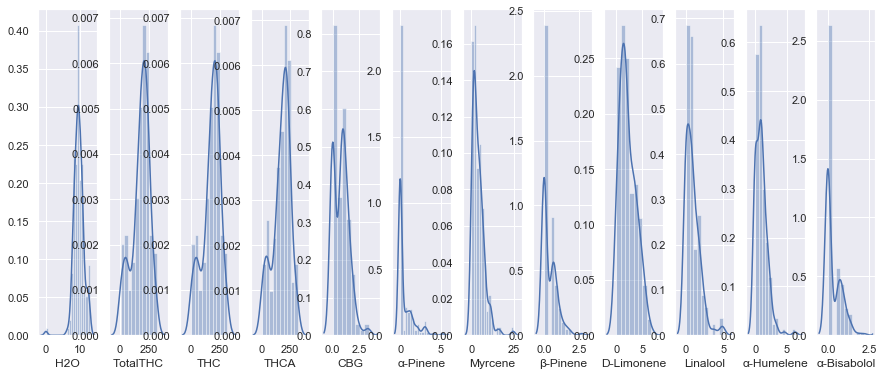

In [66]:
#checking to see if the values in feature columns are normally distributed
warnings.filterwarnings("ignore")
sns.set()
fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))=plt.subplots(ncols=12,nrows=1,figsize=(15,6)) 
sns.distplot(cleandf['H2O'],ax=ax1);
sns.distplot(cleandf['TotalTHC'],ax=ax2);            
sns.distplot(cleandf['THC'],ax=ax3);
sns.distplot(cleandf['THCA'],ax=ax4);
sns.distplot(cleandf['CBG'],ax=ax5);
sns.distplot(cleandf['α-Pinene'],ax=ax6);
sns.distplot(cleandf['Myrcene'],ax=ax7);
sns.distplot(cleandf['β-Pinene'],ax=ax8);
sns.distplot(cleandf['D-Limonene'],ax=ax9);
sns.distplot(cleandf['Linalool'],ax=ax10);
sns.distplot(cleandf['α-Humelene'],ax=ax11);
sns.distplot(cleandf['α-Bisabolol'],ax=ax12);

plt.savefig('1.png')

All the selected features are relatively normally distibuted.

In [67]:
#binning the strains on the basis of their moisture content
bins = [0, 4, 8, 11, 14]
labels = ['0-4%','4-8%','8-11%','11-14%']
cleandf['moisture content'] = pd.cut(cleandf['H2O'], bins=bins, labels=labels)

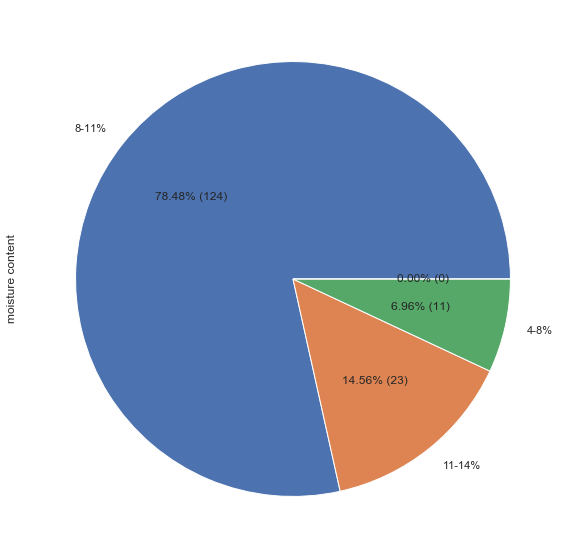

In [71]:
#showing the percentage of strains with different moisture contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['moisture content'].value_counts().sum()
cleandf['moisture content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('2.png')

In [72]:
#binning the strains on the basis of their Total THC content
bins = [0, 100, 200, 300, 400]
labels = ['0-100mg/g','100-200mg/g','200-300mg/g', '300-400mg/g']
cleandf['Total THC Content'] = pd.cut(cleandf['TotalTHC'], bins=bins, labels=labels)

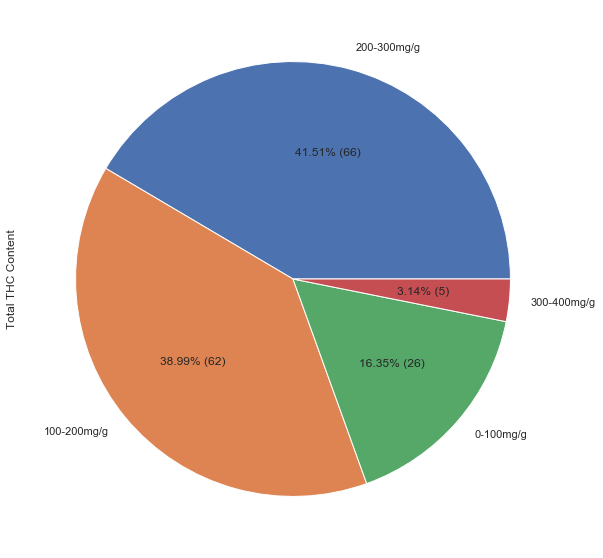

In [73]:
#showing the percentage of strains with different Total THC contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['Total THC Content'].value_counts().sum()
cleandf['Total THC Content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('3.png')

In [74]:
#binning the strains on the basis of their α-Pinene content
bins = [0, 2, 4, 6]
labels = ['0-2mg/g','2-4mg/g','4-6mg/g']
cleandf['α-Pinene Content'] = pd.cut(cleandf['α-Pinene'], bins=bins, labels=labels)

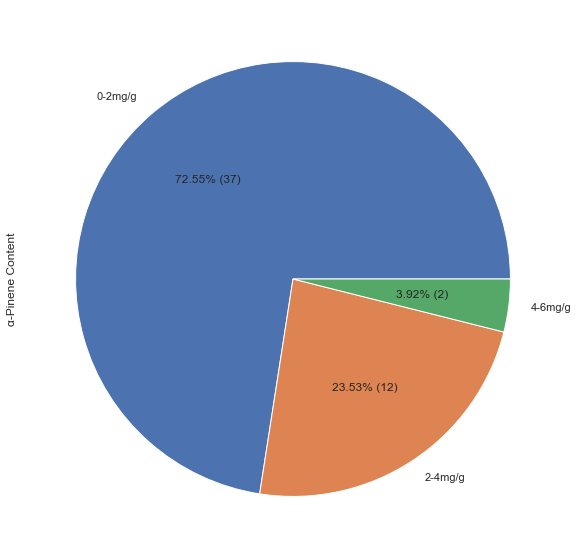

In [75]:
#showing the percentage of strains with different α-Pinene contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['α-Pinene Content'].value_counts().sum()
cleandf['α-Pinene Content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('4.png')

In [76]:
#binning the strains on the basis of their α-Pinene content
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5mg/g','5-10mg/g','10-15mg/g', '15-20mg/g', '20-25mg/g']
cleandf['Myrcene Content'] = pd.cut(cleandf['Myrcene'], bins=bins, labels=labels)

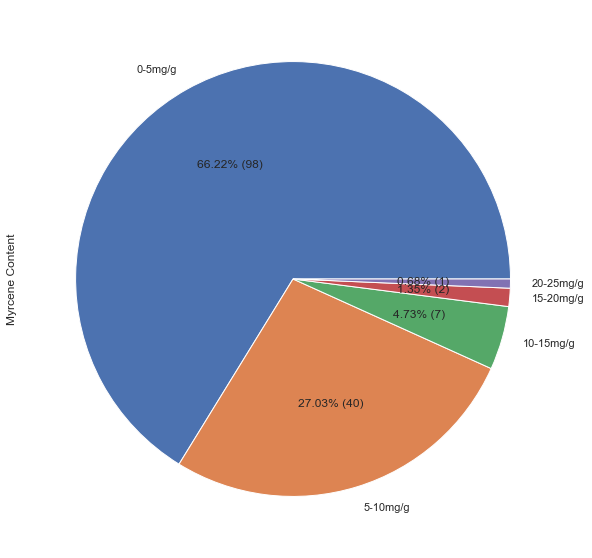

In [77]:
#showing the percentage of strains with different Myrcene contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['Myrcene Content'].value_counts().sum()
cleandf['Myrcene Content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('5.png')

In [78]:
#binning the strains on the basis of their D-Limonene content
bins = [0, 2, 4, 6, 8]
labels = ['0-2mg/g','2-4mg/g','4-6mg/g', '6-8mg/g']
cleandf['D-Limonene Content'] = pd.cut(cleandf['D-Limonene'], bins=bins, labels=labels)

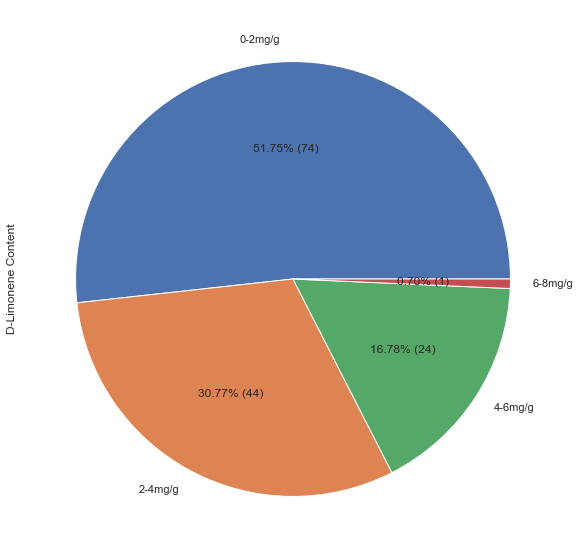

In [79]:
#showing the percentage of strains with different D-Limonene contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['D-Limonene Content'].value_counts().sum()
cleandf['D-Limonene Content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('6.png')

In [80]:
#binning the strains on the basis of their Linalool content
bins = [0, 2, 4, 6]
labels = ['0-2mg/g','2-4mg/g','4-6mg/g']
cleandf['Linalool Content'] = pd.cut(cleandf['Linalool'], bins=bins, labels=labels)

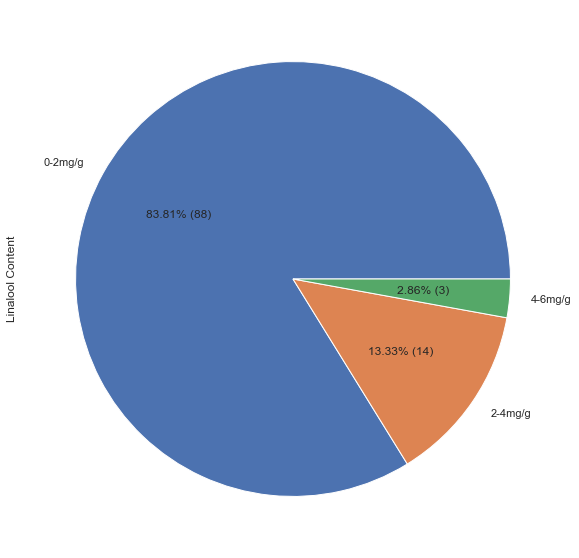

In [81]:
#showing the percentage of strains with different Linalool contents in a pie chart
plt.figure(figsize=(10,10))
total = cleandf['Linalool Content'].value_counts().sum()
cleandf['Linalool Content'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('7.png')

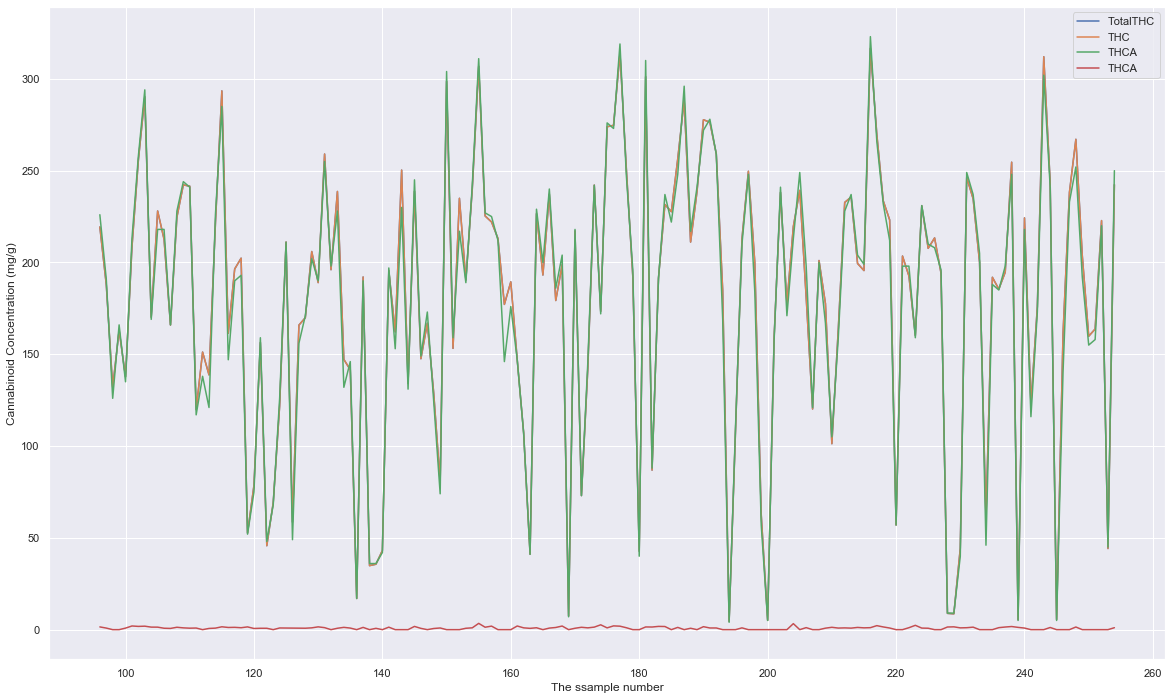

In [83]:
#Comparing the concentration of Total THC, THC, THCA and CBG in the samples in the dataset
plt.figure(figsize = (20, 12))
plt.plot(cleandf[['TotalTHC','THC','THCA', 'CBG']])
plt.xlabel("The ssample number")
plt.ylabel("Cannabinoid Concentration (mg/g)")
plt.legend(('TotalTHC', 'THC', 'THCA', 'THCA', 'CBG'))

According to the graph above, Total THC, THC and THCA concentration in a certain sample is similar however CBG is much less.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

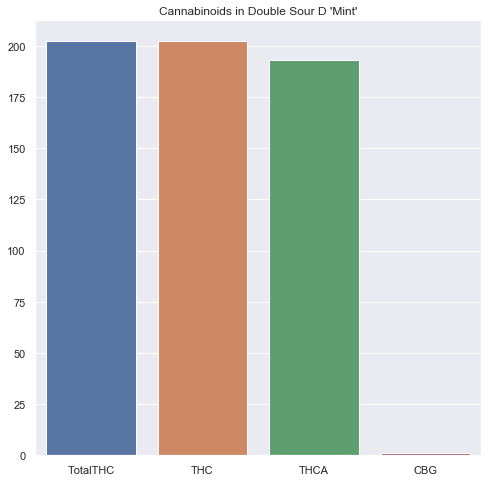

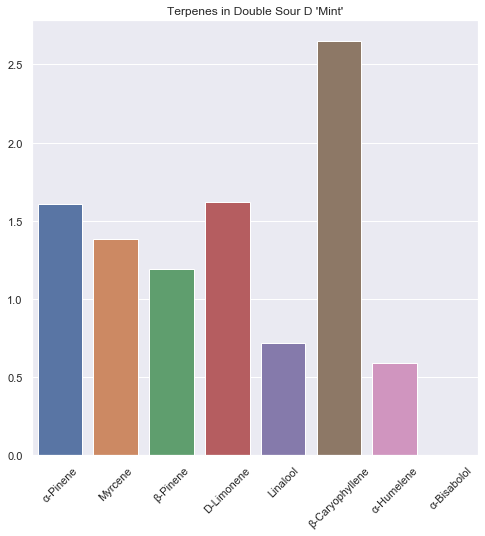

In [85]:
#The amount of Cannabinoids and terpenes in Double Sour D 'Mint' strain (Only one sample) 
plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['TotalTHC','THC','THCA','CBG']][0:1])
sns.barplot( data = group)\
.set_title("Cannabinoids in Double Sour D 'Mint'")

plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['α-Pinene','Myrcene','β-Pinene','D-Limonene', 
                                  'Linalool','β-Caryophyllene','α-Humelene','α-Bisabolol']][0:1])
sns.barplot( data = group)\
.set_title("Terpenes in Double Sour D 'Mint'")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

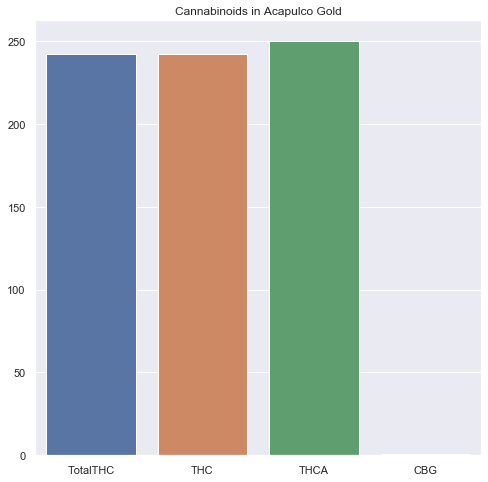

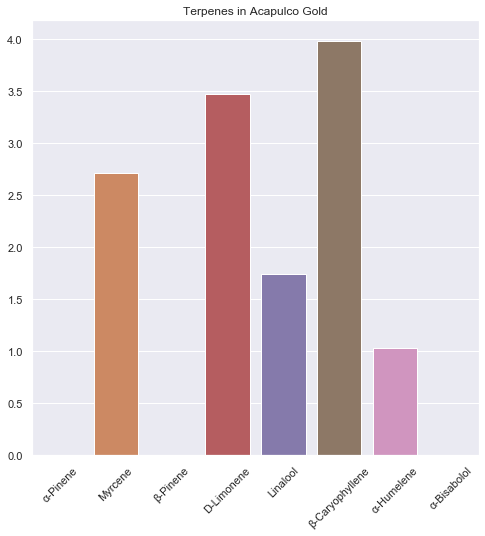

In [86]:
#The amount of Cannabinoids and terpenes in Acapulco Gold strain (Only one sample) 
plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['TotalTHC','THC','THCA','CBG']][1:2])
sns.barplot( data = group)\
.set_title("Cannabinoids in Acapulco Gold")

plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['α-Pinene','Myrcene','β-Pinene','D-Limonene', 
                                  'Linalool','β-Caryophyllene','α-Humelene','α-Bisabolol']][1:2])
sns.barplot( data = group)\
.set_title("Terpenes in Acapulco Gold")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

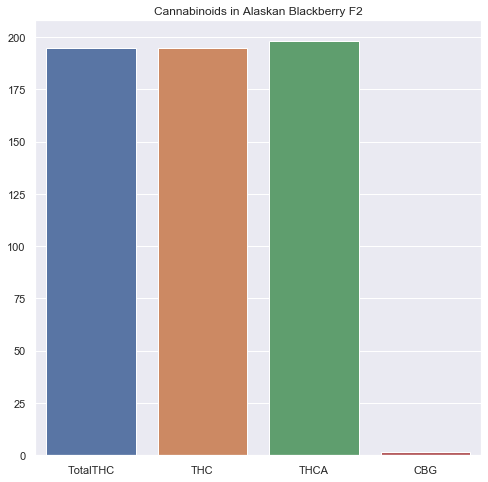

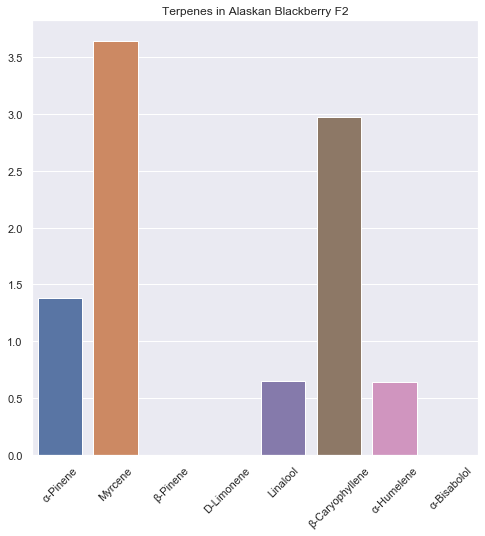

In [37]:

plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['TotalTHC','THC','THCA','CBG']][2:3])
sns.barplot( data = group)\
.set_title("Cannabinoids in Alaskan Blackberry F2")

plt.figure(figsize=(8,8))
group = (cleandf.groupby('Strain').mean()[['α-Pinene','Myrcene','β-Pinene','D-Limonene', 
                                  'Linalool','β-Caryophyllene','α-Humelene','α-Bisabolol']][2:3])
sns.barplot( data = group)\
.set_title("Terpenes in Alaskan Blackberry F2")
plt.xticks(rotation=45)

In [38]:
mldf = cleandf[['Strain','H2O','TotalTHC','THC','THCA','CBG','α-Pinene','Myrcene','β-Pinene','D-Limonene','Linalool',
         'β-Caryophyllene','α-Humelene','α-Bisabolol']]

In [39]:
mldf.head()

,Strain,H2O,TotalTHC,THC,THCA,CBG,α-Pinene,Myrcene,β-Pinene,D-Limonene,Linalool,β-Caryophyllene,α-Humelene,α-Bisabolol
96,Smarties,8.45,219.34,219.34,226.0,1.49,0.60,0.83,0.67,2.93,1.58,3.16,0.87,0.0
97,Cookies,8.25,187.94,187.94,191.0,0.86,0.00,1.86,0.00,2.95,1.43,5.84,2.03,0.0
98,Purple Wildfire,9.78,132.09,132.09,126.0,0.00,2.98,0.00,1.71,1.97,0.00,0.94,0.00,0.0
99,Superstitious,7.90,163.05,163.05,166.0,0.00,0.00,2.32,0.82,2.20,0.00,0.00,0.00,0.0
100,Mystic,8.60,137.72,137.72,135.0,0.84,0.00,1.99,0.00,1.50,0.00,1.58,0.00,0.0


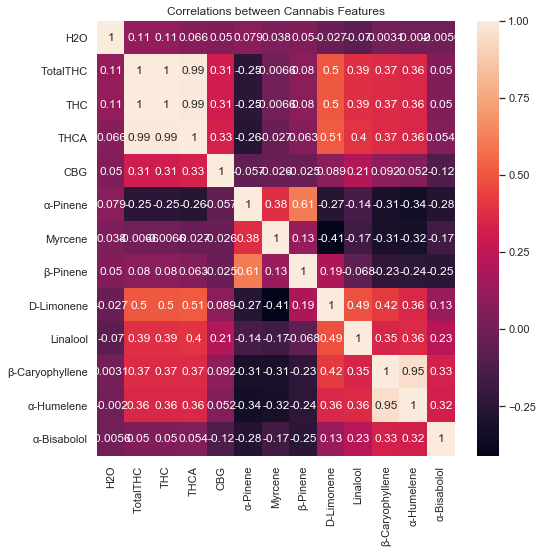

In [40]:
plt.figure(figsize=(8,8))
corr = mldf.corr(method='spearman'); 
sns.heatmap(corr,annot=True);
plt.title('Correlations between Cannabis Features');

<Figure size 2160x2160 with 0 Axes>

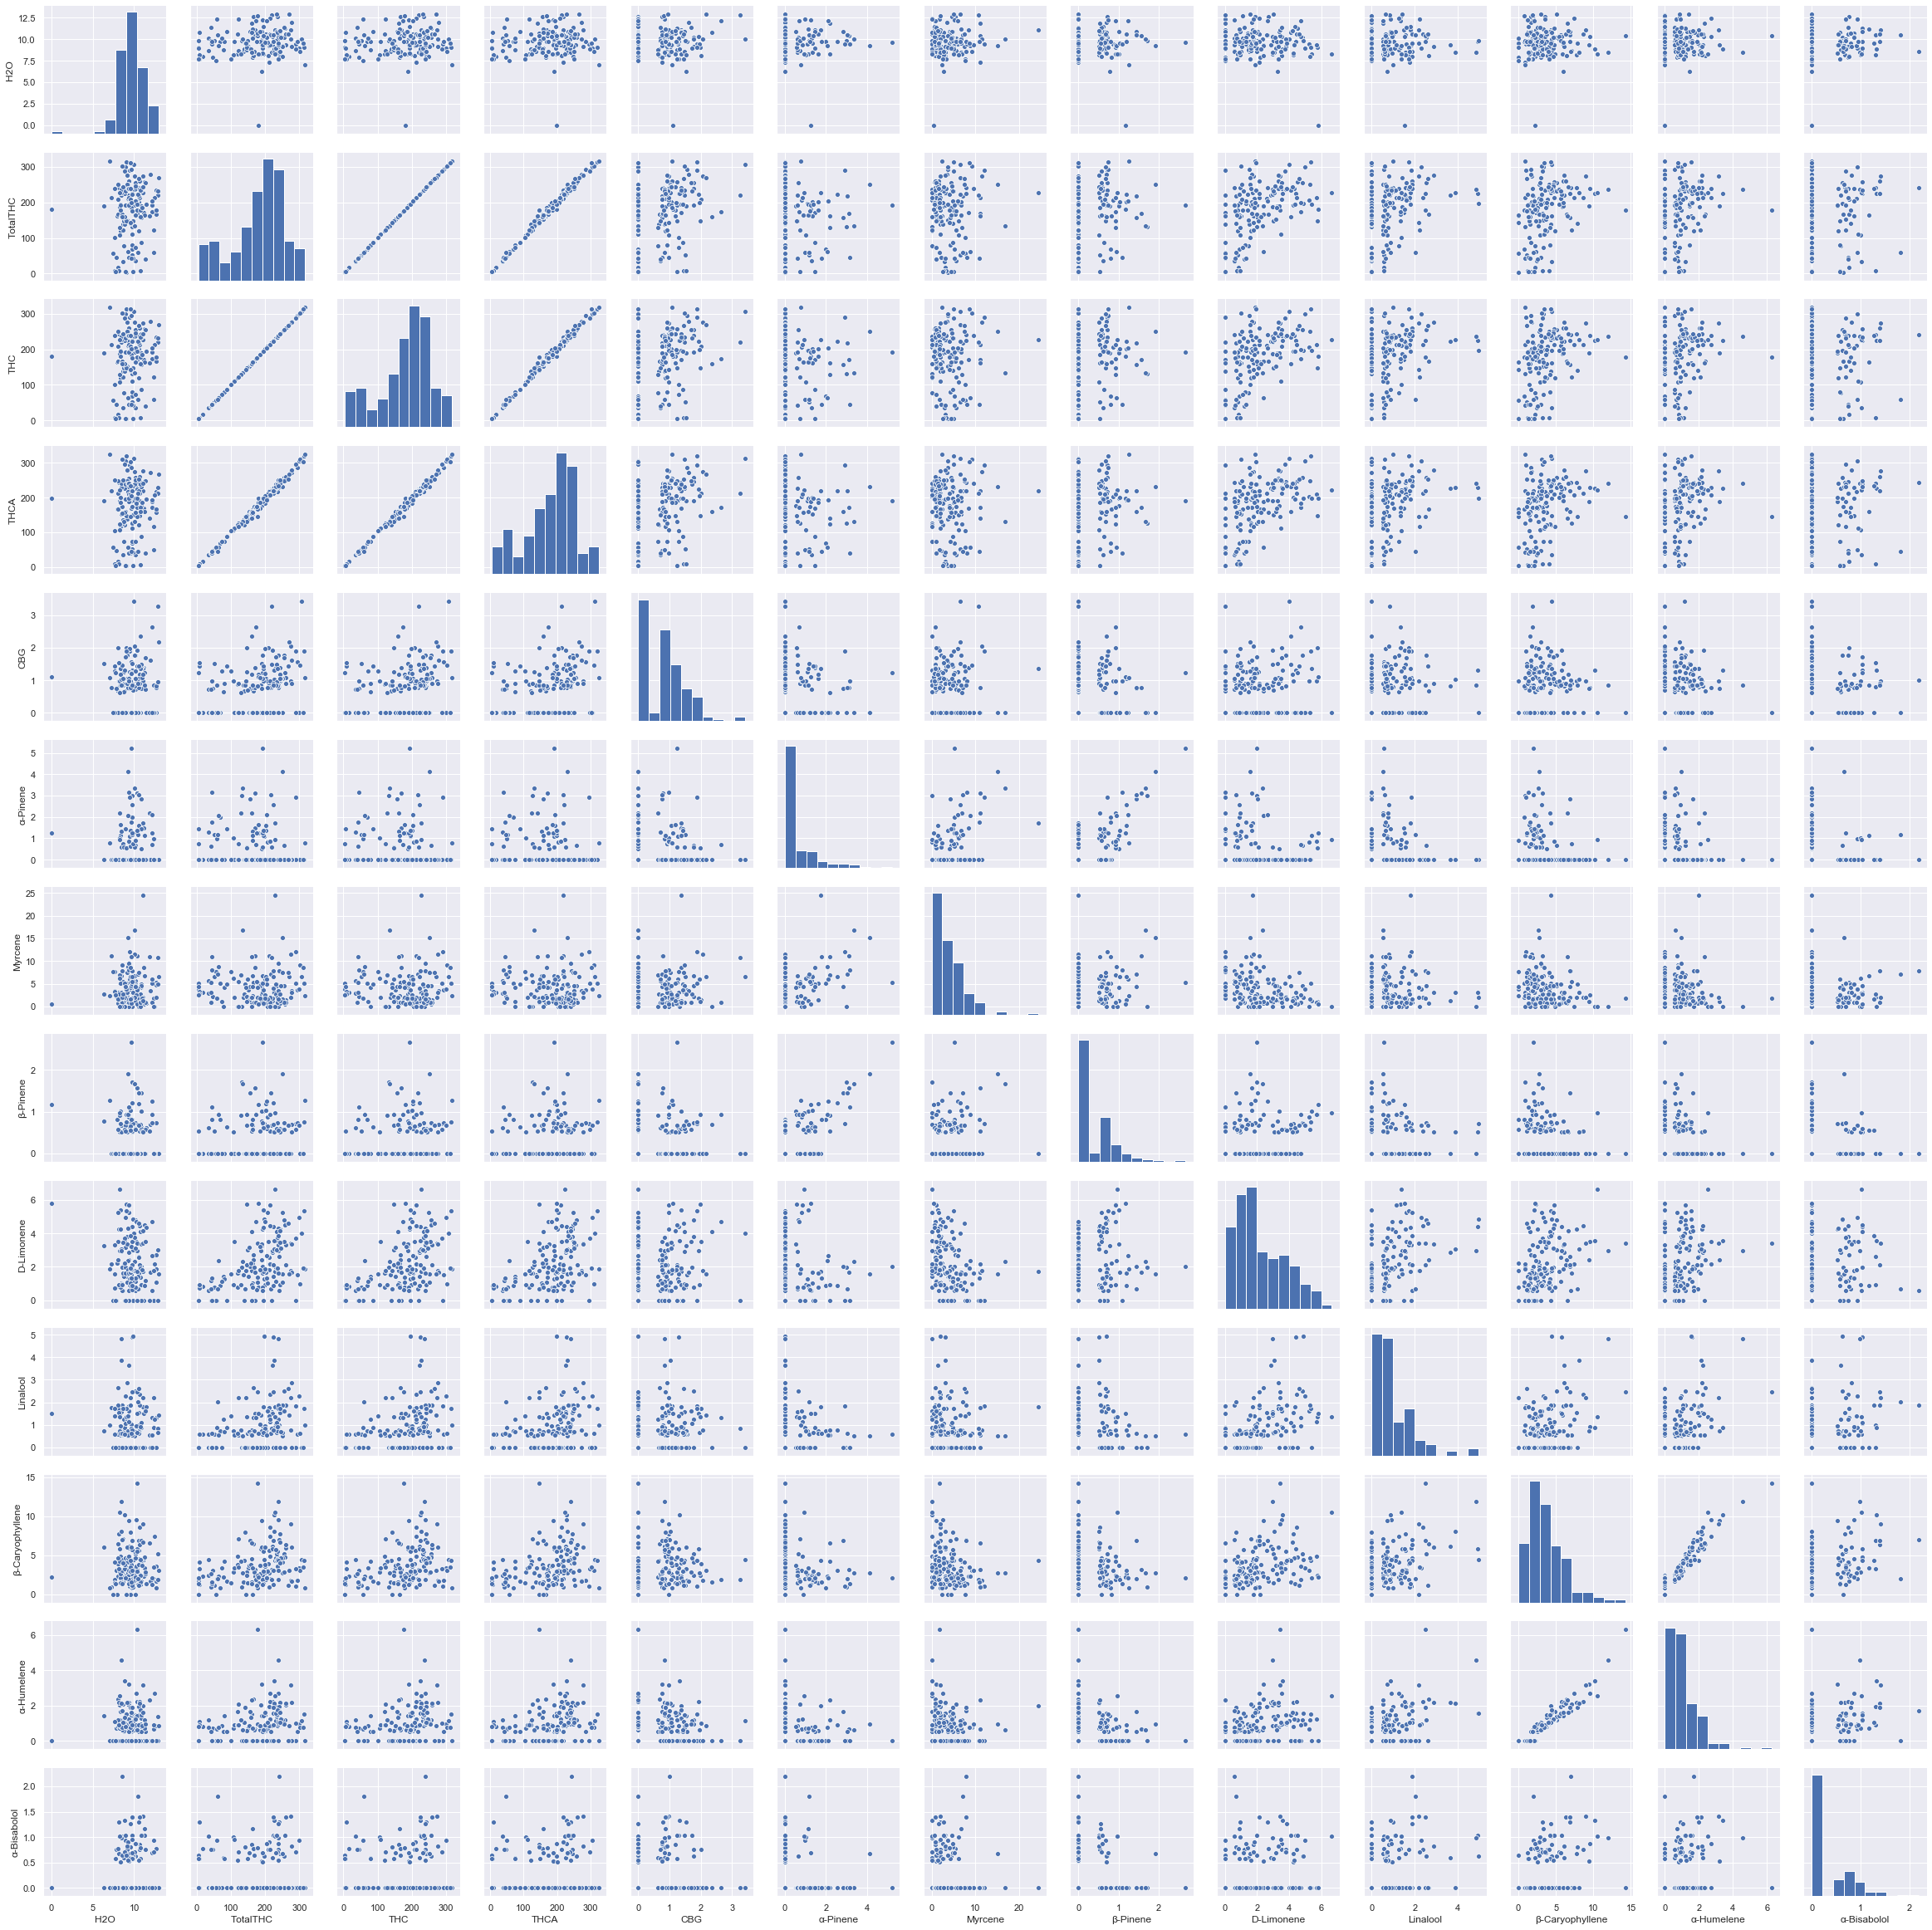

In [41]:
# PairPlots to have more insight into the correlations between features
plt.figure(figsize = (30,30))
sns.pairplot(mldf)

plt.show()